# 基于逻辑回归的鸢尾花多分类预测实验
本实验将演示如何使用逻辑回归模型对鸢尾花数据集进行多分类预测，包括OVR和SoftMax两种方法，涵盖数据读取、分析、预处理、建模、评估及结论。

## 1. 读取数据
数据集文件名为 `iris.csv`，位于当前目录。

In [2]:
import pandas as pd
data_iris = pd.read_csv('iris.csv')
# 查看数据维度
data_iris.shape

(150, 6)

## 2. 描述性分析与可视化分析

In [3]:
# 查看数据的随机五项
data_iris.sample(5)

,Unnamed: 0,sepal_l,sepal_w,petal_l,petal_w,classes
118,118,7.7,2.6,6.9,2.3,2.0
98,98,5.1,2.5,3.0,1.1,1.0
21,21,5.1,3.7,1.5,0.4,0.0
87,87,6.3,2.3,4.4,1.3,1.0
54,54,6.5,2.8,4.6,1.5,1.0


In [4]:
# 查看数据统计描述
data_iris.describe()

,Unnamed: 0,sepal_l,sepal_w,petal_l,petal_w,classes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# 查看数据缺失值
data_iris.isnull().sum()

Unnamed: 0    0
sepal_l       0
sepal_w       0
petal_l       0
petal_w       0
classes       0
dtype: int64

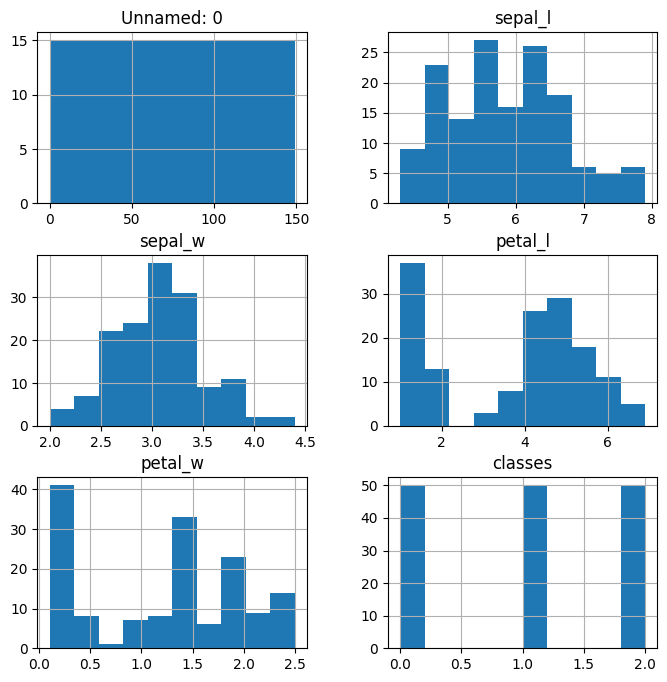

In [6]:
import matplotlib.pyplot as plt
data_iris.hist(figsize=(8,8))
plt.show()

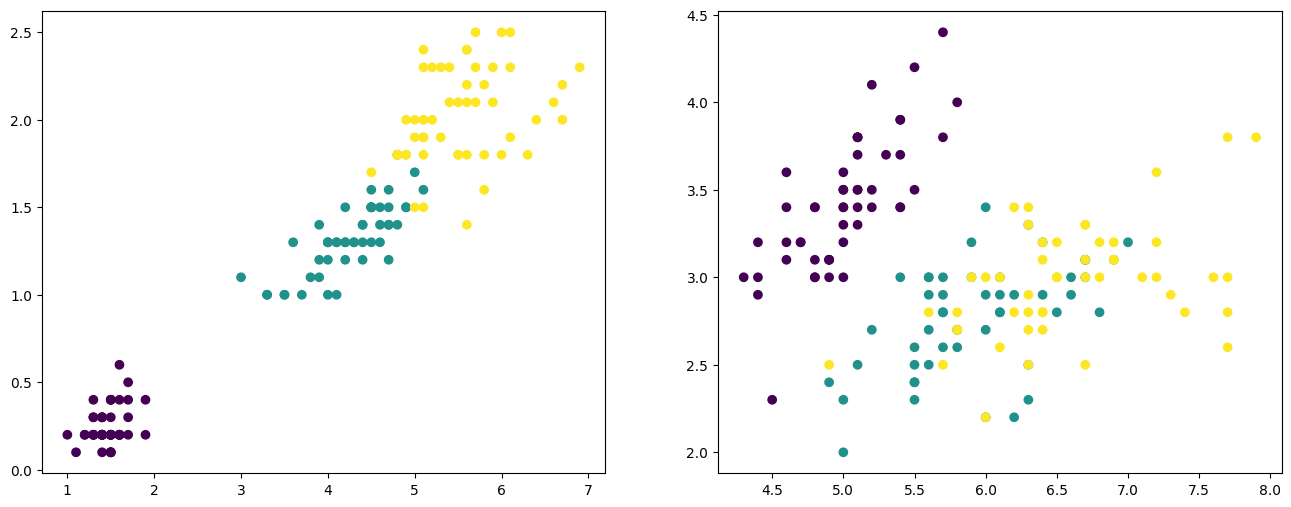

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x=data_iris['petal_l'], y=data_iris['petal_w'],c=data_iris['classes'])
plt.subplot(122)
plt.scatter(x=data_iris['sepal_l'], y=data_iris['sepal_w'],c=data_iris['classes'])
plt.show()

## 3. 数据预处理

In [8]:
# 划分自变量和因变量
X = data_iris.iloc[:,:-1]
y = data_iris.iloc[:,-1]
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2)
X_tr.shape,X_ts.shape

((120, 5), (30, 5))

## 4. 建立逻辑回归模型

In [9]:
from sklearn.linear_model import LogisticRegression
model_ovr = LogisticRegression(random_state=0, multi_class='ovr')
model_ovr.fit(X_tr,y_tr)
model_sm = LogisticRegression(random_state=0, multi_class='multinomial',solver='lbfgs')
model_sm.fit(X_tr,y_tr)

C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


## 5. 模型预测与评估

In [10]:
# 对测试集进行预测
y_ovr_pred = model_ovr.predict(X_ts)
y_sm_pred = model_sm.predict(X_ts)
# 查看OVR预测混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_ts,y_ovr_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]])

In [11]:
# 查看SoftMax预测混淆矩阵
confusion_matrix(y_ts,y_sm_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]])

In [12]:
# 查看混淆矩阵评分
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_ovr_pred))
print('*'*60)
print(classification_report(y_ts,y_sm_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# 10折交叉验证计算OVR模型准确率
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_ovr, X, y, cv=10, scoring='accuracy')
scores.mean()

C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was de

np.float64(0.9533333333333334)

In [14]:
# 10折交叉验证计算SoftMax模型准确率
scores = cross_val_score(model_sm, X, y, cv=10, scoring='accuracy')
scores.mean()

C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

np.float64(1.0)

## 6. 实验结论
1. 逻辑回归可以通过OVR和SoftMax两种方式实现多分类预测。
2. OVR模型测试集模型f1-score请见上方输出，交叉验证准确率请见上方输出。
3. SoftMax模型测试集模型f1-score请见上方输出，交叉验证准确率请见上方输出。
4. 本实验中，SoftMax模型效果好于OVR模型。